## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [5]:
print(data.describe())

            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.

In [4]:
print("\nМаксимальні значення:")
print(data.max())
print("\nМінімальні значення:")
print(data.min())


Максимальні значення:
index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

Мінімальні значення:
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object


In [3]:
print("\nРозмірність датасету:")
print(data.shape)


Розмірність датасету:
(17379, 15)


In [2]:
data = get_data(data_path="motorbike_ambulance_calls.csv")

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [6]:
print(data.dtypes)


index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [7]:
print(data.count())

index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

1. Опис вибірки:

    - Датасет має 17379 рядків і 15 стовпців.
    - Середнє значення cnt (кількість викликів) складає 189.46

2. Максимальні та мінімальні значення:

    - date містить дату від 1/1/11 до 9/9/12.
    - Найвищий cnt (кількість викликів) - 977, що є максимальним значенням, а найнижчий - 1.

3. Типи даних та кількість даних:
  
    - Весь набір даних заповнений, і відсутні пропущені значення
    - Типи даних коректні, кожна змінна має очікуваний тип.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [9]:
from datetime import datetime

def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


C:\Users\legio\AppData\Local\Temp\ipykernel_16512\695428204.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [29]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
  
get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


In [30]:
#your conclusions


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [10]:
data['season'] = data['season'].astype(str)
data_categorical = data.select_dtypes(include=['object'])

print(data_categorical.head())

   season
0  spring
1  spring
2  spring
3  spring
4  spring


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [11]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season_mapping = {"spring": 1, "summer": 2, "autumn": 3, "winter": 4}
  df[season_col_name] = df[season_col_name].map(season_mapping)
  return df
  
data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

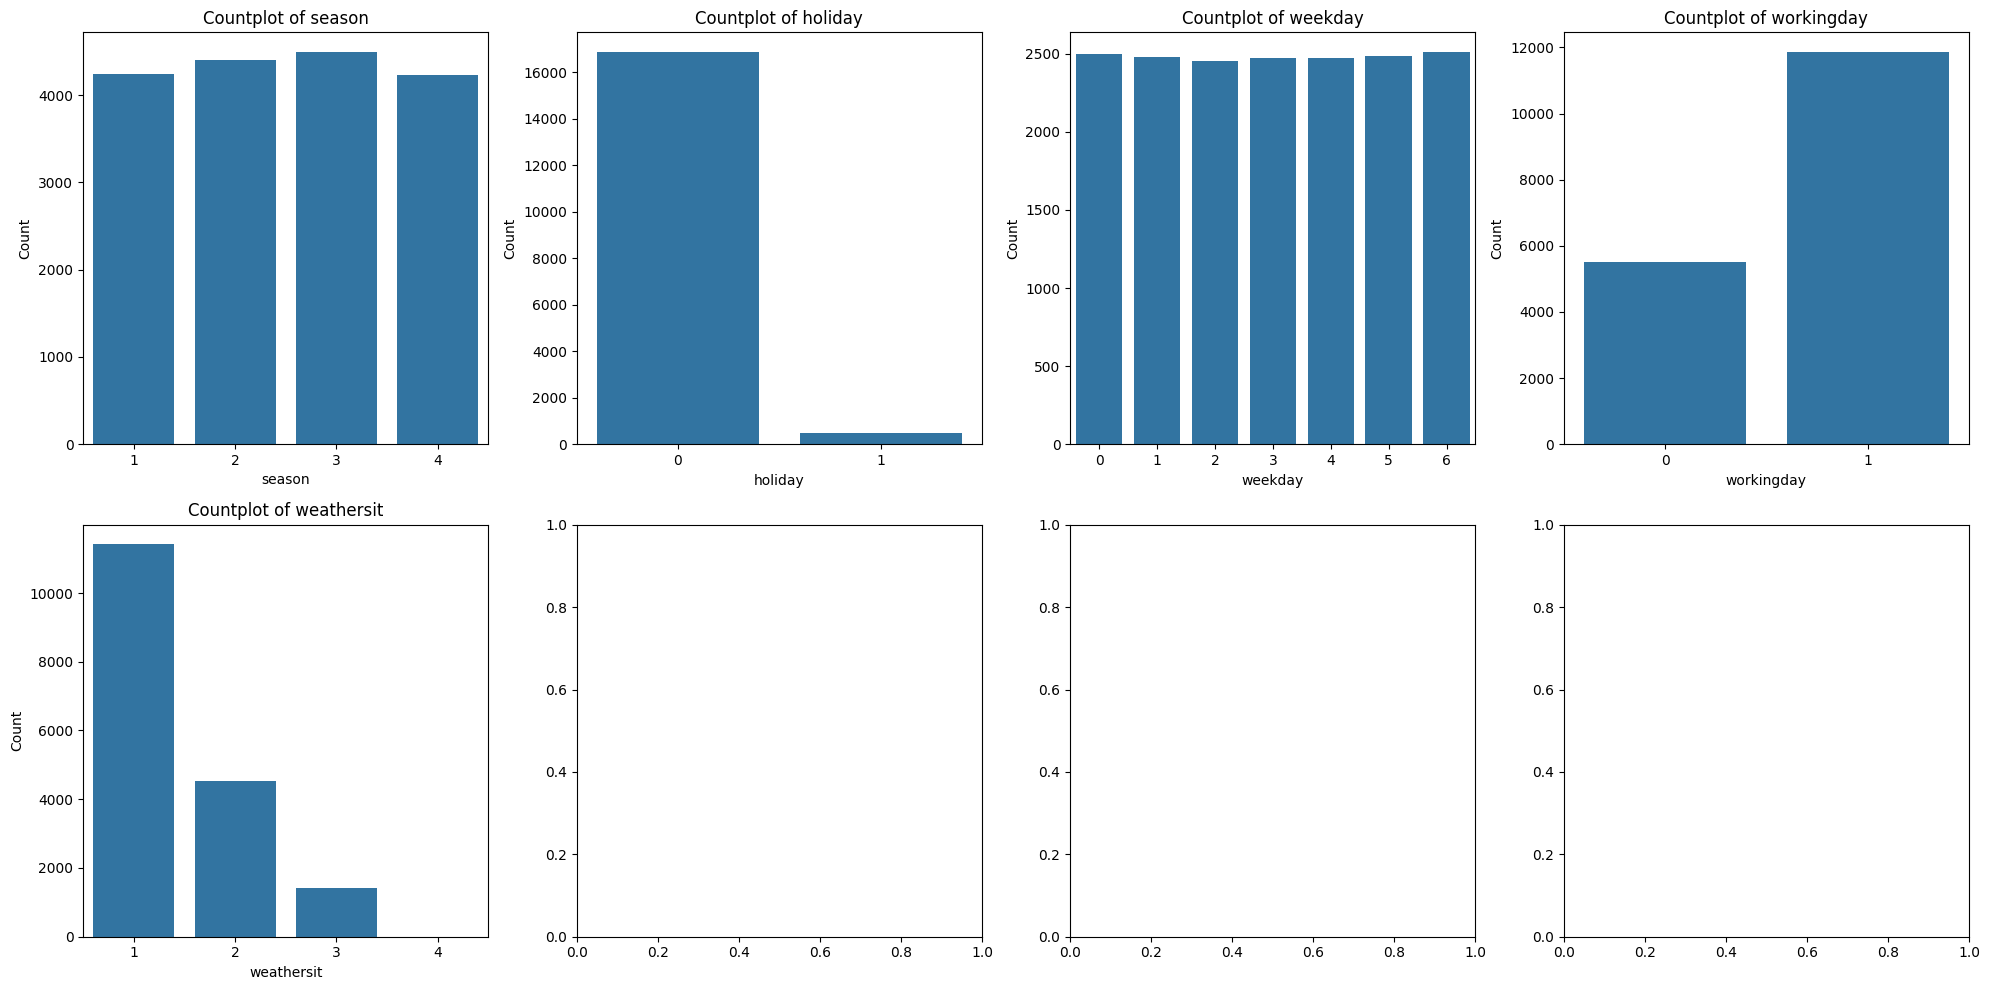

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

categorical_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']

for col, subplot in zip(categorical_cols, ax.flatten()):
  sns.countplot(x=col, data=data, ax=subplot)
  subplot.set_title(f'Countplot of {col}')
  subplot.set_xlabel(col)
  subplot.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**

1.  Завдання 5:

      - Виділено категоріальні змінні: season, holiday, weekday, workingday, weathersit.

2.  Завдання 6:
      - Змінну season перетворено в числову шкалу за допомогою словника.
3.  Завдання 7:
      - Найпоширеніша пора року - весна.
      - Більшість днів не вихідні, будні та робочі.
      - Найпоширеніший тип погоди - 2



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [13]:
data_numerical = data.select_dtypes(include=['float64', 'int64']).copy()

print(data_numerical.head())

   index  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0      1       1   0     1   0        0        6           0           1   
1      2       1   0     1   1        0        6           0           1   
2      3       1   0     1   2        0        6           0           1   
3      4       1   0     1   3        0        6           0           1   
4      5       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

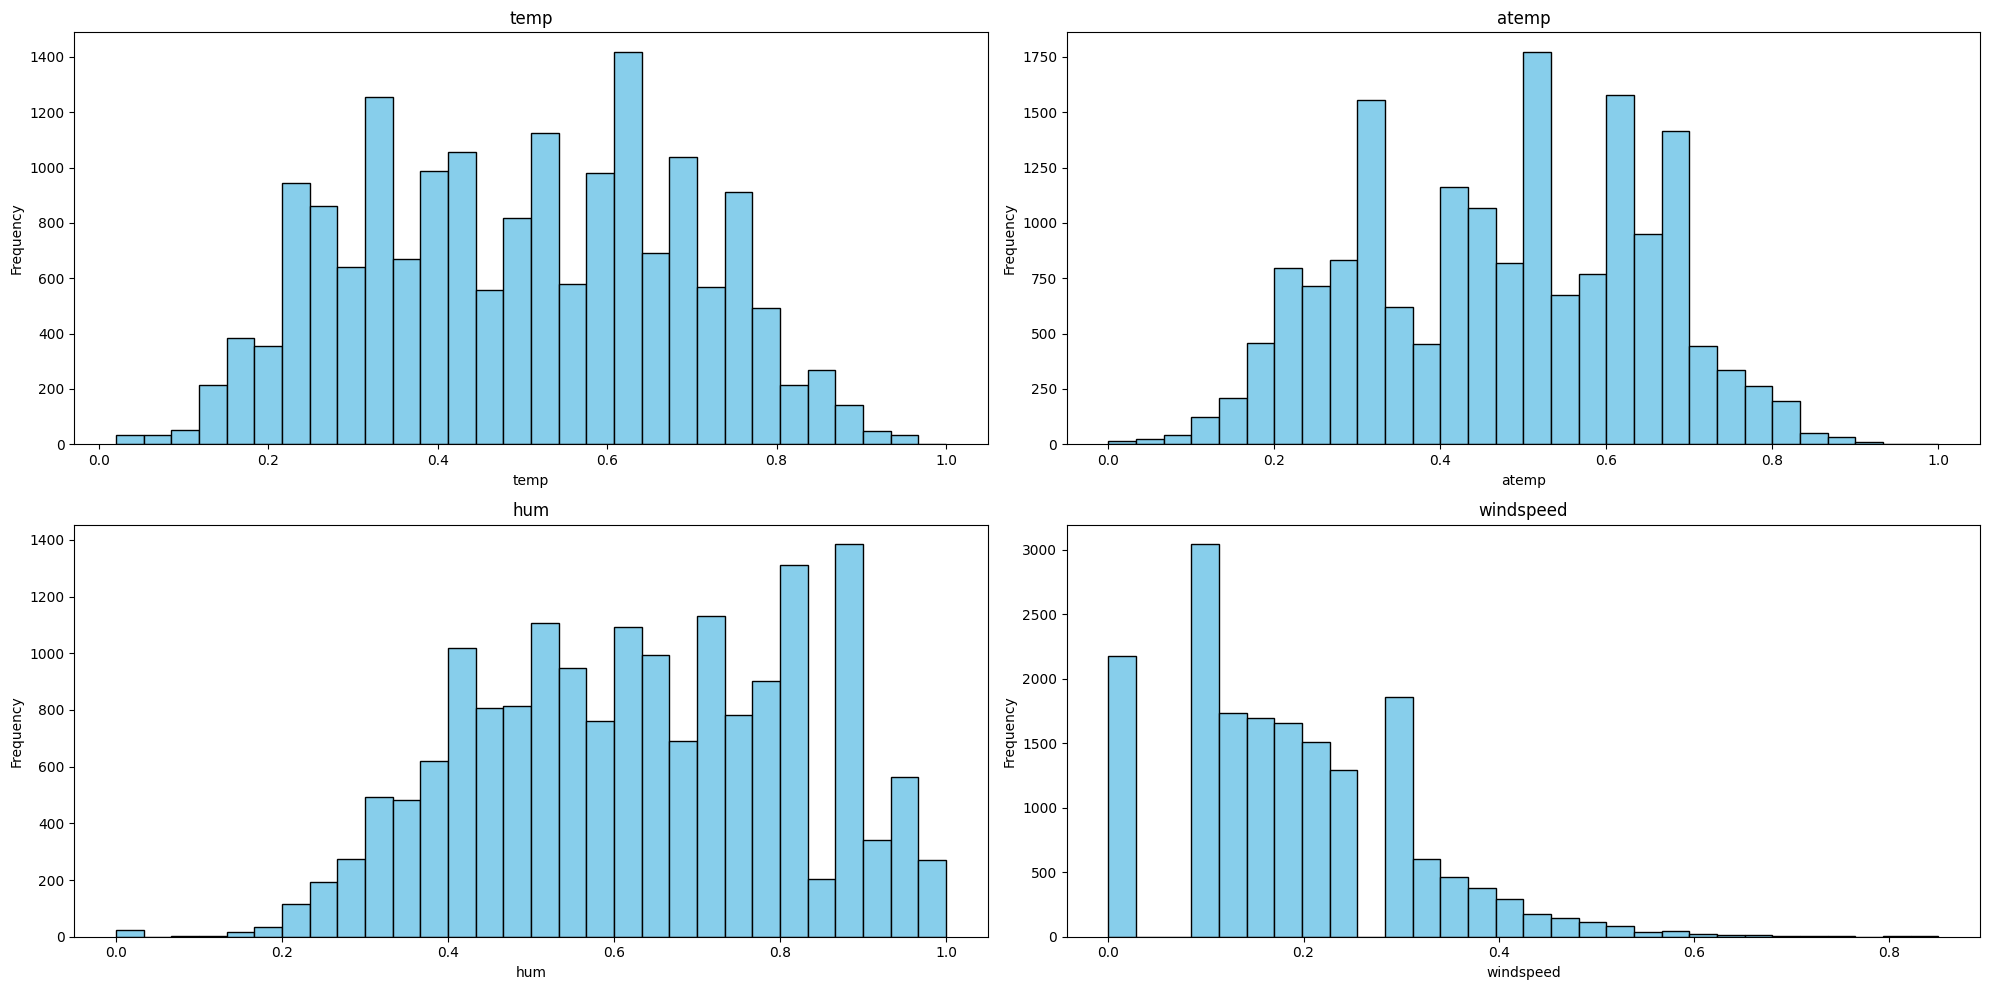

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for col, subplot in zip(numerical_cols, ax.flatten()):
    subplot.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    subplot.set_title(col)
    subplot.set_xlabel(col)
    subplot.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

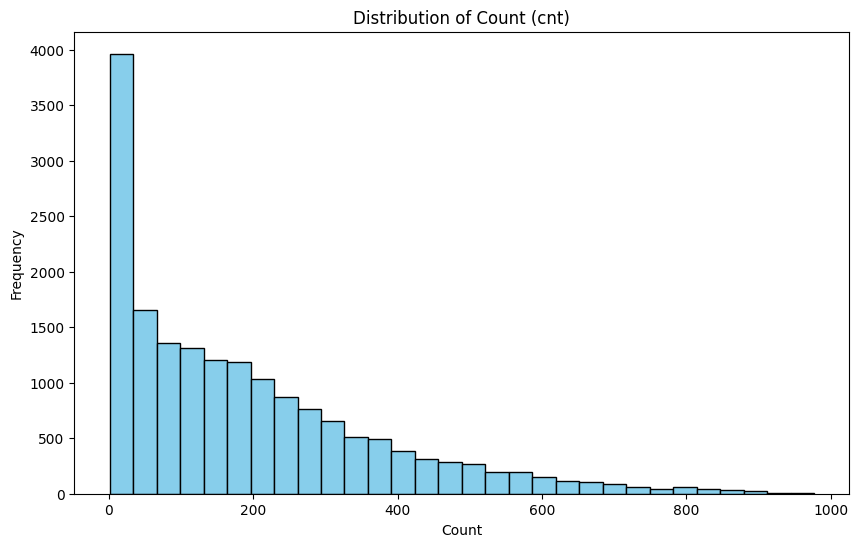

Коефіцієнт нахилу: 0.01006460953277201


In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(data['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Count (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

x = np.arange(len(data))
slope, intercept = np.polyfit(x, data['cnt'], 1)
print(f"Коефіцієнт нахилу: {slope}")

**Висновки з 8-10 завдання (детальні)**

1.   Завдання 8:

    1) index: це індекс рядка в датасеті.
    
    2) yr: рік, до якого відноситься запис (0: 2011, 1: 2012).

    3) mnth: місяць від 1 до 12.

    4) hr: година від 0 до 23.

    5) holiday: чи був це день свята (1) чи ні (0).

    6) weekday: день тижня, де 0 - неділя, 1 - понеділок, ..., 6 - субота.

    7) workingday: чи був це робочий день (1) чи ні (0).

    8) weathersit: оцінка погодних умов, де 1 - ясно, хмарно, 2 - туман або хмарно, 3 - легкий сніг, дощ або гроза, 4 - сильний дощ, град або туман.

    9) temp: нормалізована температура в градусах.

    10) atemp: нормалізована відчутна температура в градусах.

    11) hum: нормалізована вологість повітря.

    12) windspeed: нормалізована швидкість вітру.
    
    13) cnt: кількість викликів швидкої допомоги.

2.  Завдання 9:
    temp:

        - Більшість значень знаходяться в діапазоні 800-1000.

        - Рідше трапляються значення нижче 200 та вище 1400.
    atemp:

        - Більшість значень знаходяться в діапазоні 1000-1250.

        - Рідко трапляються значення нижче 250 та вище 1750.
    hum:

        - Більшість значень знаходяться в діапазоні 500-1000.

        - Рідко трапляються значення нижче 200 та вище 3000.
    windspeed:
    
        - Більшість значень знаходяться в діапазоні 0.2-0.4.
        
        - Рідко трапляються значення нижче 0.0 та вище 1.0.
        
3. Завдання 10:
    - Найпоширеніші значення: 200-400.
    - Розподіл: правосторонній.

    Коефіцієнт нахилу: 0.01006460953277201




#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

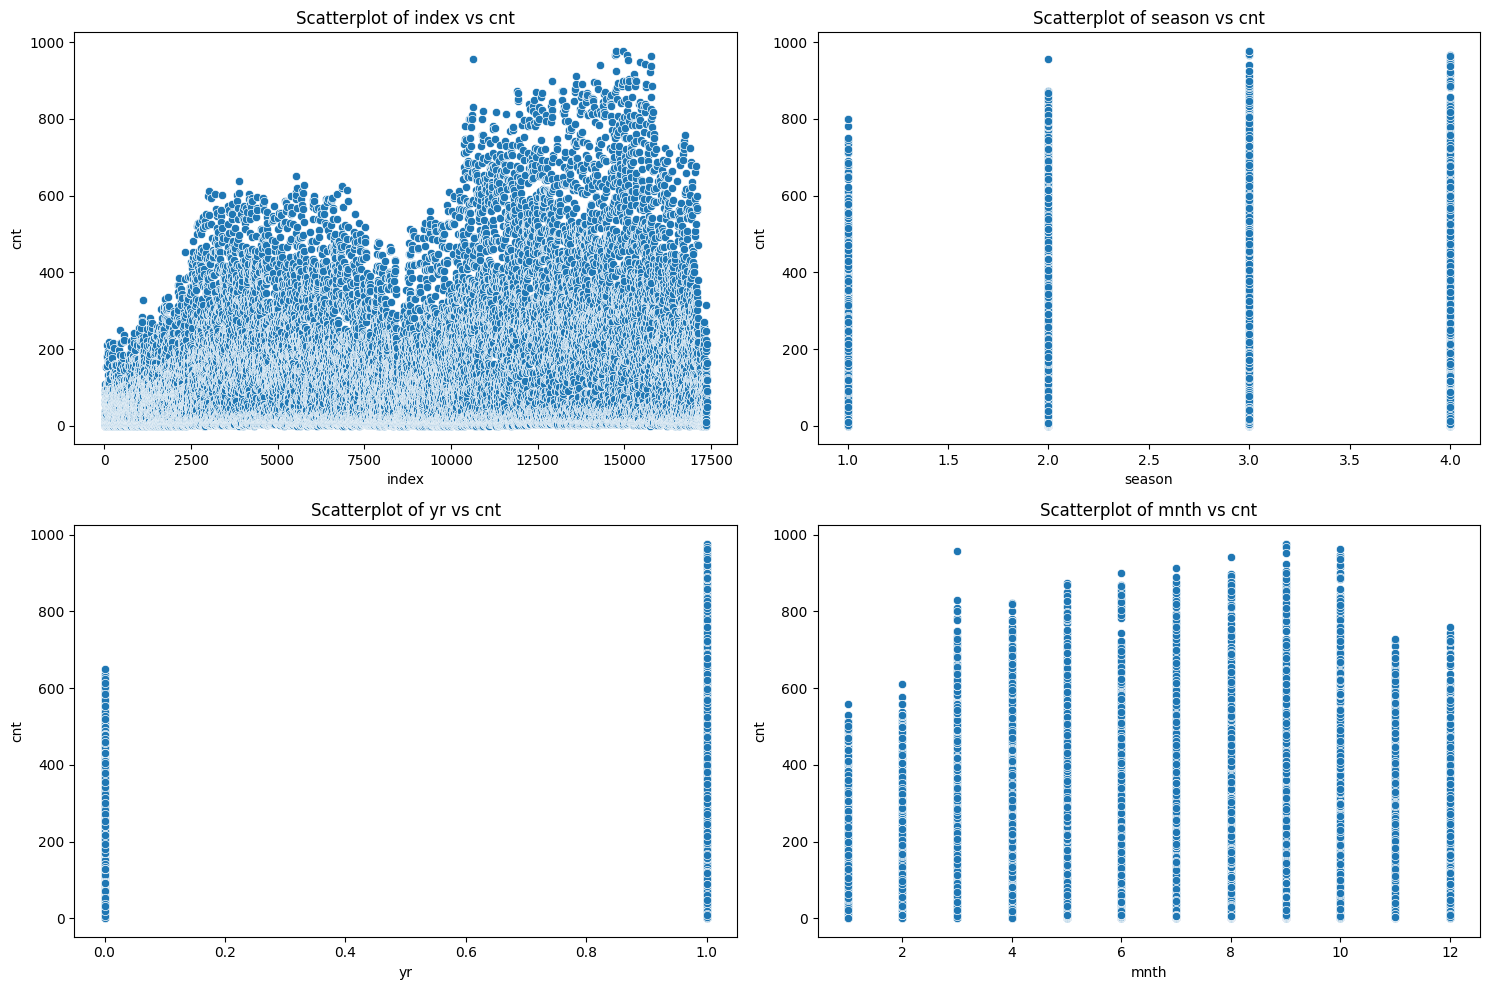

In [16]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(x=var, y='cnt', data=data_numerical, ax=subplot)
  subplot.set_title(f'Scatterplot of {var} vs cnt')
  
plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

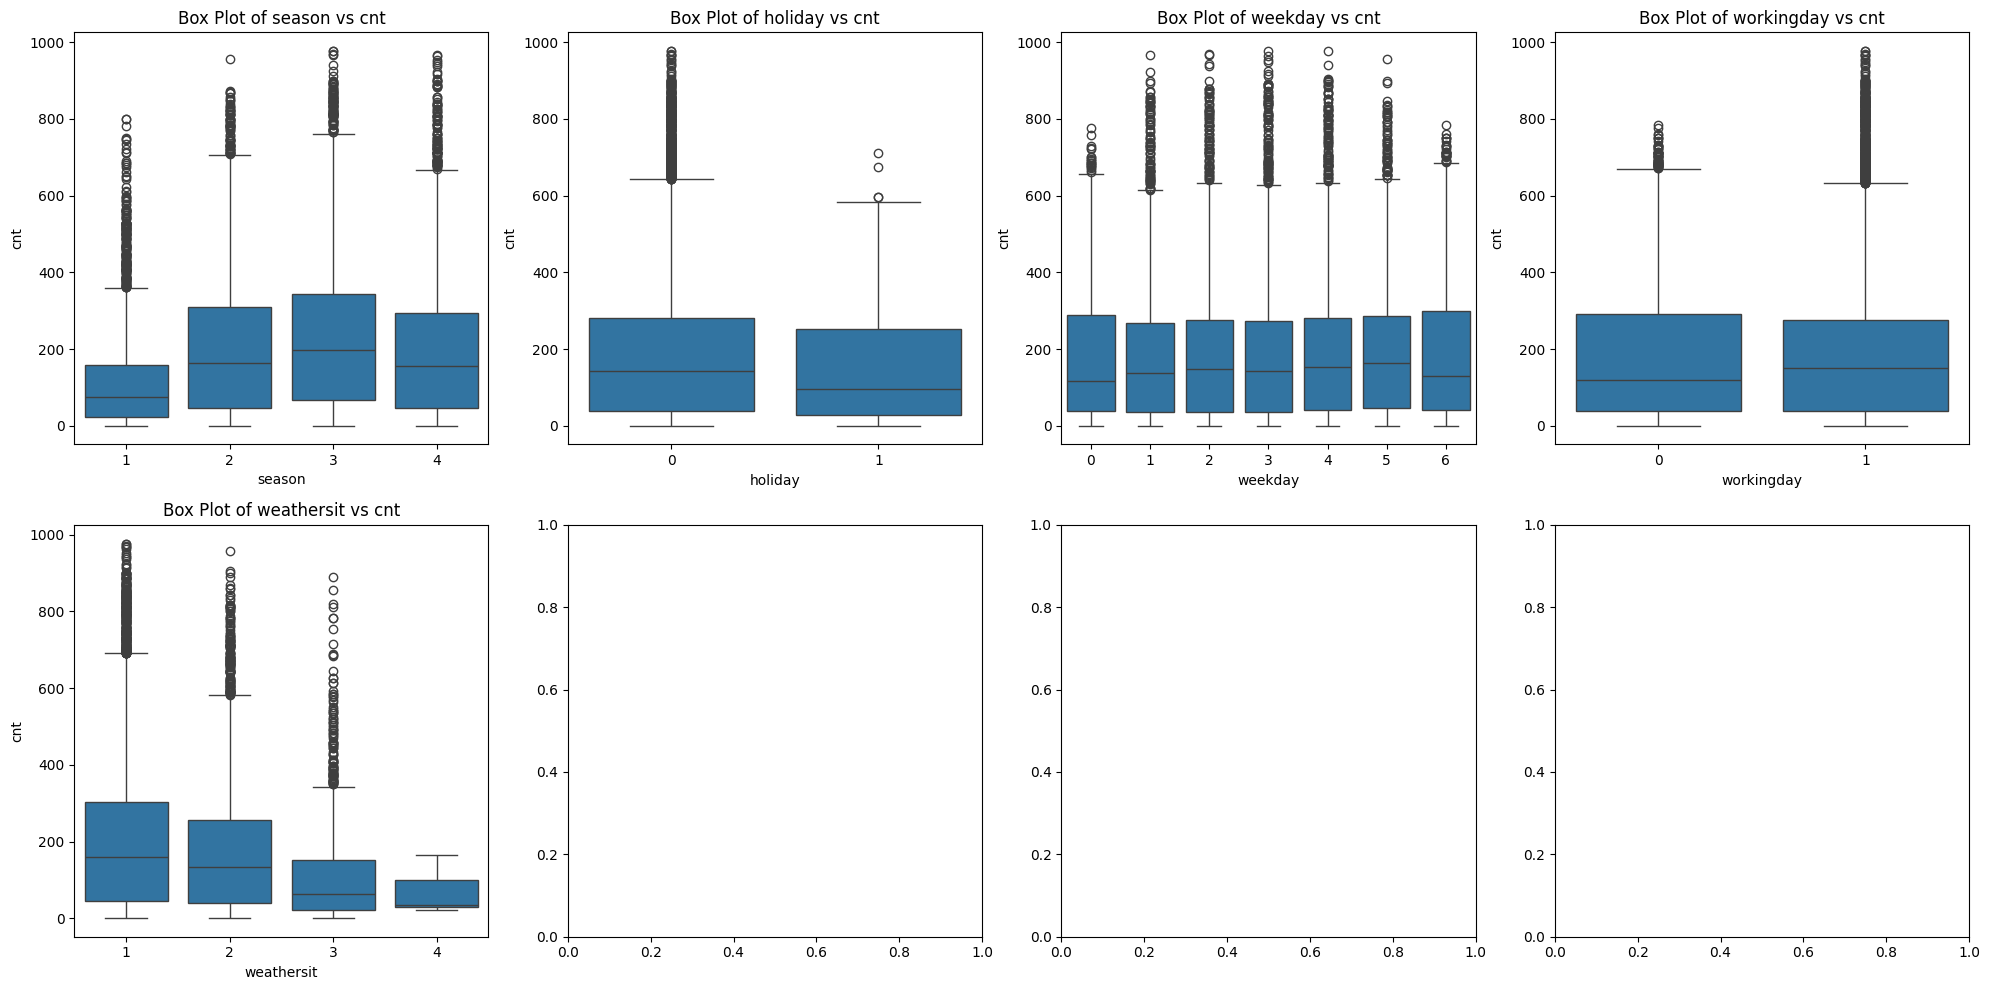

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, var in enumerate(categorical_cols):
    sns.boxplot(x=var, y='cnt', data=data, ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f'Box Plot of {var} vs cnt')
  
plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**

1.  Завдання 11:

    Зв'язок між index та cnt:
    - Графік Scatterplot показує слабку позитивну кореляцію між index та cnt. Коли значення index зростає, значення cnt також має тенденцію до зростання, але зв'язок не дуже сильний.
    - Існує деякий розкид даних, що свідчить про те, що не всі точки даних відповідають цій тенденції.

    Зв'язок між season та cnt:
    - Графік Scatterplot показує, що зв'язок між season та cnt не є чітким. Немає чіткої тенденції до зростання чи спадання.
    - Дані розподілені більш-менш рівномірно по осі season

    Зв'язок між yr та cnt:
    - Графік Scatterplot показує слабку позитивну кореляцію між yr та cnt. Коли значення yr зростає, значення cnt також має тенденцію до зростання, але зв'язок не дуже сильний.
    - Не всі точки даних відповідають цій тенденції.

    Зв'язок між mnth та cnt:
    - Графік Scatterplot показує, що зв'язок між mnth та cnt не є чітким. Немає чіткої тенденції до зростання чи спадання cnt з mnth.
    - Дані розподілені більш-менш рівномірно по осі mnth.

2.  Завдання 12:

    Season: 
    - Найбільша медіана cnt спостерігається в весняний сезон.
    - Найменша медіана cnt спостерігається в зимовий сезон.
    - Найбільший розкид даних спостерігається в осінній сезон.

    Holiday: 
    - Найбільша медіана cnt спостерігається у вихідні дні.
    - Найменша медіана cnt спостерігається у будні дні.

    Weekday: 
    - Найбільша медіана cnt спостерігається у вівторок та середу.
    - Найменша медіана cnt спостерігається у неділю.

    Workingday: 
    - Найбільша медіана cnt спостерігається у робочі дні.
    - Найменша медіана cnt спостерігається у неробочі дні.

    Weathersit:
    - Найбільша медіана cnt спостерігається при ясному та частково хмарному небі.
    - Найменша медіана cnt спостерігається при сильному дощі.





**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

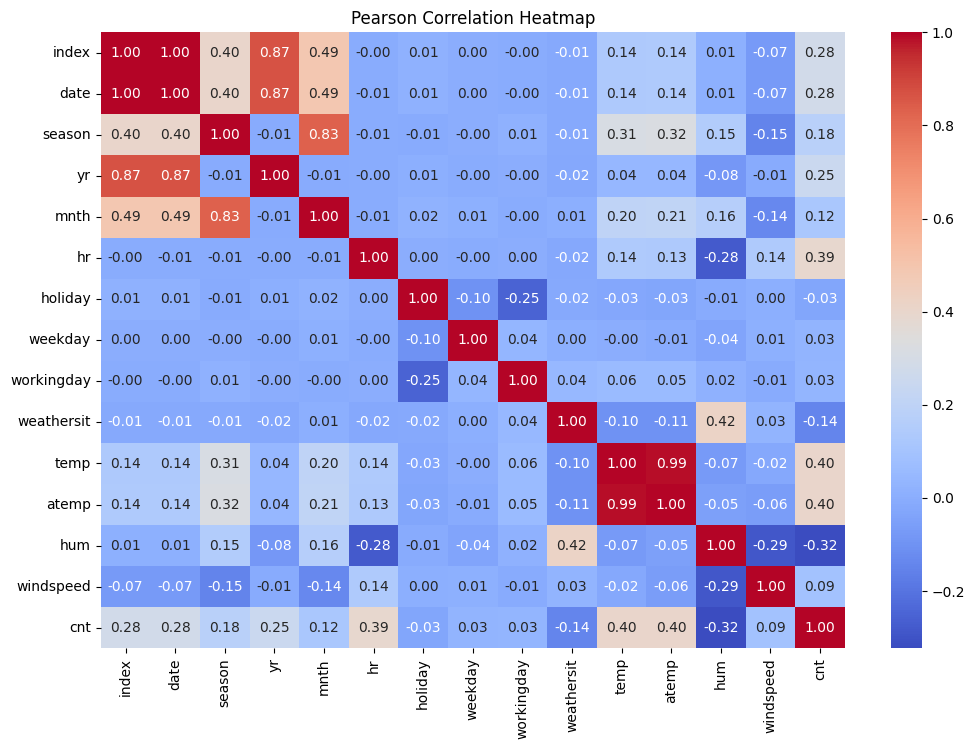

In [18]:
corr_matrix_pearson = data.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

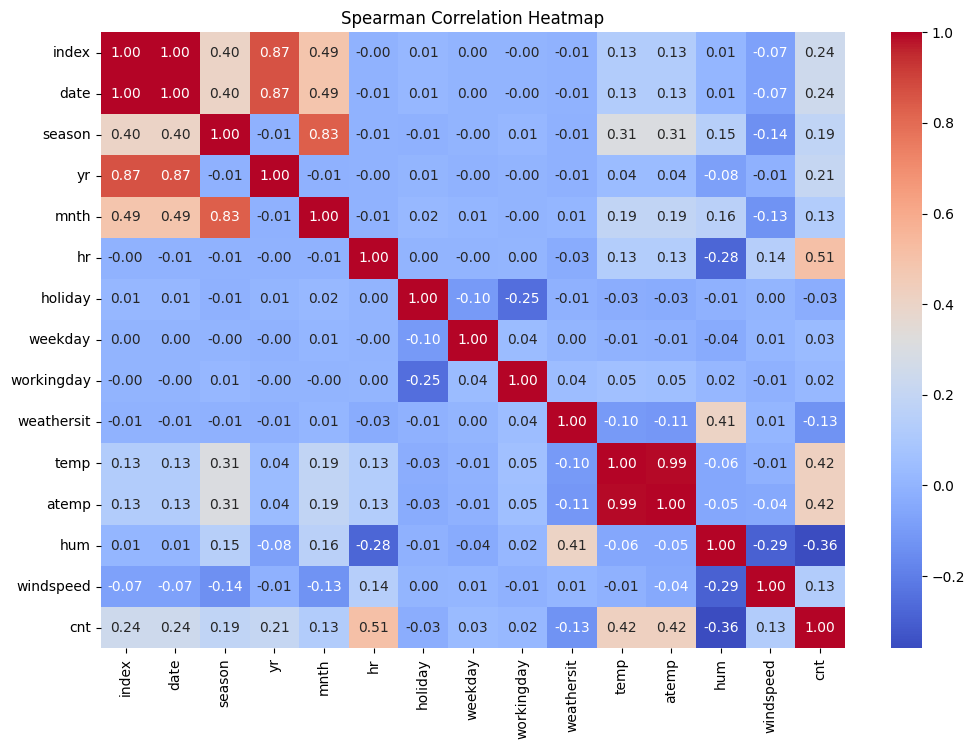

In [19]:
corr_matrix_spearman = data.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

In [20]:
# Висновки
# 1. Найсильніший зв'язок спостерігається між температурою та вітром (коефіцієнт кореляції 0,42).
# 2. Істотний зв'язок також спостерігається між температурою та вологістю (коефіцієнт кореляції -0,32), тиском (коефіцієнт кореляції -0,29) та кількістю хмар (коефіцієнт кореляції -0,28).
# 3. Слабкий зв'язок спостерігається між температурою та іншими змінними, такими як дата, сезон, місяць, день тижня, робочий день, тип погоди та максимальна температура.
# 4. Обидва методи (Пірсона та Спірмена) дають схожі результати, що означає лінійний зв'язок між температурою та іншими змінними.

# Пірсон - лінійний зв'язок, Спірмен - будь-який зв'язок, незалежно від лінійності.



**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [21]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season'], prefix='season'),
                      pd.get_dummies(df['mnth'], prefix='mnth'),
                      pd.get_dummies(df['weekday'], prefix='weekday'),
                      pd.get_dummies(df['weathersit'], prefix='weathersit'),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [22]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [23]:
def create_night_hours(df: pd.DataFrame):
    df['night_hours'] = df['hr'].apply(lambda x: 1 if (x < 6 or x > 18) else 0)
    df = df.drop('hr', axis=1)
    return df

features = create_night_hours(features)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [24]:
print('spring' in features.columns)
print('hr' in features.columns)

features_lr = features.drop(['mnth_4', 'weekday_0', 'weathersit_1', 'atemp', 'date'], axis=1)

False
False


In [25]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis=1)
  y = df[target]
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42)
  X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
  return X_train, X_test, X_val, y_train, y_test, y_val

In [26]:
X_train, X_test, X_val, y_train, y_test, y_val = get_train_data(features_lr, 'cnt', 0.3)

In [27]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [28]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 17995.536, test: 17814.266
R^2 train: 0.462, test: 0.450


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

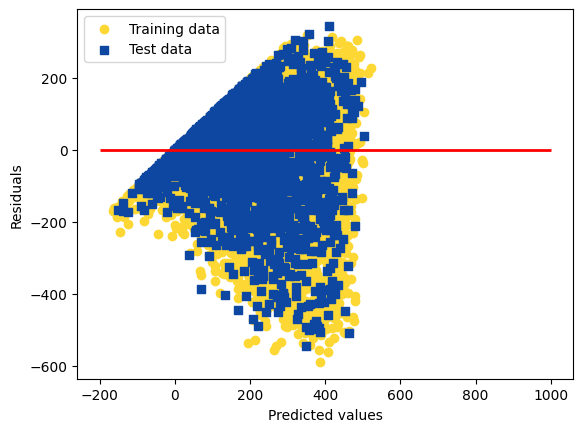

In [30]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='#FDD835', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='#0D47A1', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-200, xmax=1000, lw=2, color='red')
plt.show()

**Висновки з завдання (детальні)**

1. Модель лінійної регресії демонструє помірну здатність прогнозувати цільову змінну.
    - MSE: (середня квадратична похибка)
      - Train: 17995.536
      - Test: 17814.266
    - R^2: (коефіцієнт детермінації)
      - Train: 0.462
      - Test: 0.450

2.  На діаграмі розсіювання, точки даних нерівномірно розподілені по осі X. Це може бути признаком гетероскедастичності.
